# Punto 1
## a) ¿Quién ganaría por eliminación iterativa?
Cada jugador tiene un orden de preferencias entre las alternativas del universo de opciones.
Definimos las propiedades que queremos que tenga la función objetivo, es decir la que mapea las preferencias para definir al ganador. Vamos a trabajar con una función de decisión social. Para la eliminación iterativa vamos a realizar un recuento de votos y eliminar al candidato con menos votos en cada ronda. 


In [11]:
from collections import Counter

votes = Counter()

candidates = ["A", "B", "C", "D"]
voting_jury = [["B", "C", "D", "A"], ["C", "D", "A", "B"], ["D", "A", "B", "C"]]

def total_votes():
    votes = Counter()
    for votes_jury in voting_jury:
        votes[votes_jury[0]] += 1
    return votes

def get_winner():
    global voting_jury
    
    while len(candidates) > 1:
        votes = total_votes()
        loser = min(votes, key=votes.get)
        del candidates[candidates.index(loser)]

        voting_jury = [[candidate for candidate in preference if candidate in candidates] 
                       for preference in voting_jury]

    winner = candidates[0]
    print(f"El ganador por eliminación iterativa es {winner}")

get_winner()

El ganador por eliminación iterativa es C


## b) ¿Quién ganaría por Borda rule?
Borda Rule nos dice que si hay n-1 opciones le asigno n-1 puntos a cada opción, en orden decreciente. Es decir, cada votante elige su orden de preferencia y asigna n-1 puntos a su favorito, n-2 al segundo, y así hasta asignar 0 al último. Gana el candidato que tenga más puntos.

En nuestro ejemplo, como hay 4 candidatos el candidato en la primera posición recibe 3 puntos, el segundo 2 puntos, el tercero 1 punto y el cuarto candidato 0 puntos.

Candidato A: 0 + 1 + 2 = 3 puntos
Candidato B: 3 + 0 + 1 = 4 puntos
Candidato C: 2 + 3 + 0 = 5 puntos
Candidato D: 1 + 2 + 3 = 6 puntos

Por lo tanto según esta regla el candidato ganador es D.

## c) Sistema de votación que asegure la victoria de A.
Se podría asignar un mayor puntaje a los votos destinados a A, por ejemplo si hubiera un dictador que prefiera a A por sobre el resto. Pero esto tendría que afectar el principio de equidad y justicia en la votación.

En el ejemplo dado ninguno prefiere a A por sobre todo el resto. Entonces si ganara A no se cumpliría con la propiedad de Pareto-eficiente, es decir que nunca se va a elegir a una alternativa A1 siendo que hay una alternativa A2 que todos prefieren. En este caso todos prefieren al candidato D por sobre A.
Aunque una dictadura es una función de bienestar Pareto-eficiente.

# Punto 2
Como vimos en clase, la cascada de información es el fenómeno en el cual se traspasa información. En este caso las decisiones se toman en forma secuencial a partir de la información sobre la ganancia de todos los individuos que vinieron antes.  
La señal nos da información útil de si conviene aceptar.  

Las cascadas pueden estar equivocadas porque se basan en muy poca información, entonces la información de unos pocos se ve magnificada.  
A partir de un cierto threshold la cascada se produce. Pero también podría considerarse a las cascadas como frágiles, pudiéndose detener.


a) La decisión de un individuo se va a ver influenciada por las decisiones de los que vinieron antes. Si los primeros en adoptar la tecnología experimentan ganancias negativas esto va a enviar una señal negativa a los siguientes individuos. De esta manera se producirá una cascada de rechazo, haciendo que cada individuo tome la decisión de rechazar la tecnología ya que cada individuo tendrá en cuenta las experiencias negativas anteriores.
Si la tecnología es mala, podría decirse que rechazarla va a ser la estrategia dominante.

b) Aunque podría surgir una cascada de rechazo sería menos probable que en el caso anterior. Si la tecnología es buena, la información acumulativa de las ganancias positivas debería fomentar que los individuos adopten la tecnología como buena, produciendo una cascada de aceptación.
Podría darse que la desconfianza inicial obstaculizara la formación de una cascada positiva. 
En este caso tenderíamos a pensar que la estrategia dominante va a ser aceptar la tecnología.


# Punto 3
## a) E y F son early adopters.
E y F son early adopters.
Recordando que early adopters significa que no importa lo que pase, los nodos siempre van a elegir A. Y además la regla del umbral (threshold) dice que para que un nodo adopte un comportamiento, al menos la mitad de sus vecinos debe haber adoptado ese comportamiento, procederemos a analizar el ejemplo dado.

Vamos a graficar el grafo inicial y la evolución de los nodos:

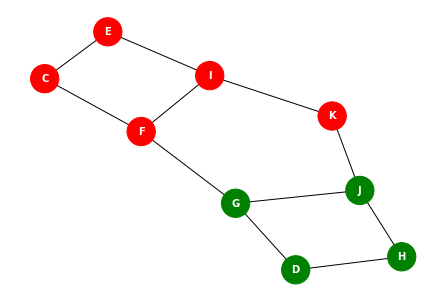

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

nodes = ['C', 'E', 'F', 'I', 'K', 'G', 'D', 'H', 'J']
conections = [('C', 'E'), ('C', 'F'), ('E', 'I'), ('I', 'F'), ('I', 'K'),
              ('F', 'G'), ('F', 'C'), ('F', 'I'), ('G', 'D'), ('G', 'J'), ('G', 'F'),
              ('K', 'I'), ('K', 'J'), ('D', 'G'), ('D', 'H'), ('H', 'D'), ('H', 'J'), ('J', 'K'),
              ('J', 'G'), ('J', 'H')]

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(conections)

eatly_adopters_A = ['E', 'F', 'C', 'I','K']

nodes_colors = ['red' if node in eatly_adopters_A else 'green' for node in G.nodes]

positions = nx.spring_layout(G)
nx.draw(G, pos=positions, with_labels=True, node_color=nodes_colors, node_size=800, font_size=10,
        font_color='white', font_weight='bold')

plt.show()

En la primer iteración:  
C tiene dos vecinos (E,F) que adoptaron el comportamiento A. Por lo tanto C adopta el comportamiento A.  
G tiene a 2 de sus vecino (D,J) que no adoptaron el comportamiento A, por lo tanto no lo adopta.  
I tiene dos vecinos (E,F) que adoptaron el comportamiento A. Por lo tanto C adopta el comportamiento A.  
K en la primer iteración no tiene vecinos con el comportamiento A, por lo tanto no lo adopta.  

En la segunda iteración:  
K tiene a la mitad de sus vecinos que adoptaron el comportamiento A, por lo tanto lo adopta.  
Pero el resto de los nodos no adoptarán el comportamiento A, ya que al menos la mitad de sus vecinos no lo adoptaron.  
Por lo tanto los nodos que implementarán el comportamiento A serán: E,F,C,I,K.  

## b) El comportamiento A no se propaga a través de toda la red
En el ejemplo dado podemos pensar que tenemos dos componentes conexas o comunidades. Una formada por los nodos C,E,F,I,K y otra formada por los nodos G,D,H,J.  
La característica que impide que el comportamiento A se propague por toda la red es la presencia de estas comunidades sin conexiones significativas entre ellas. Es decir, la red está dividida en dos componentes que no están fuertemente interconectadas.  
Cuando la red tiene componentes o comunidades de este tipo, la información o el comportamiento tiende a quedar confinado en dichas comunidades, sin propagarse a través de la red.  

Para que el comportamiento A se propague por toda la red tendría que haber un early adopter de A en cada comunidad. Es decir  si G fuera un early adopter, el resto de los nodos implementarían el comportamiento A.
